<a href="https://colab.research.google.com/github/leenu10/Data_Preprocessing/blob/main/Week10_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data from a URL

In [ ]:
url = 'http://bit.ly/drinksbycountry'

But the data is not in a tabular form

In [ ]:
# convert the data into a tabular form.
pd.read_table(url)


,"country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent"
0,"Afghanistan,0,0,0,0.0,Asia"
1,"Albania,89,132,54,4.9,Europe"
2,"Algeria,25,0,14,0.7,Africa"
3,"Andorra,245,138,312,12.4,Europe"
4,"Angola,217,57,45,5.9,Africa"
...,...
188,"Venezuela,333,100,3,7.7,South America"
189,"Vietnam,111,2,1,2.0,Asia"
190,"Yemen,6,0,0,0.1,Asia"
191,"Zambia,32,19,4,2.5,Africa"


The overall tabular form came, but not in the desired format. For that we have to use 'sep' parameter in the read_table() function.

In [ ]:
pd.read_table(url, sep=',')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


## Loading data that is not located in the same folder where the pyhton file belongs into python console or jupyter notebook.

In [ ]:
# works in jupyter notebook.
# data = pd.read_csv(r'C:\Users\Mathew\OneDrive\Documents\Data Science\ICT Academy\dataStudentsPerformance.csv')
# OR
# data = pd.read_csv('C:/Users/Mathew/OneDrive/Documents/Data Science/ICT Academy/data/StudentsPerformance.csv')

# Loading Data into the python environment

In [2]:
data = pd.read_csv('/content/beer-servings.csv')
data

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...,...
188,188,Venezuela,NaN,100.0,3.0,7.7,South America
189,189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,190,Yemen,6.0,0.0,0.0,0.1,Asia
191,191,Zambia,32.0,19.0,4.0,2.5,Africa


## Handling the 'Unnamed: 0' column

In [3]:
# drop the column
#data.drop('Unnamed: 0', inplace=True, axis=1)

In [4]:
# or we can make the column as the index column.
data = pd.read_csv('/content/beer-servings.csv', index_col='Unnamed: 0')
data

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,NaN,100.0,3.0,7.7,South America
189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,Yemen,6.0,0.0,0.0,0.1,Asia
191,Zambia,32.0,19.0,4.0,2.5,Africa


In [5]:
data.shape

(193, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 185 non-null    float64
 2   spirit_servings               185 non-null    float64
 3   wine_servings                 187 non-null    float64
 4   total_litres_of_pure_alcohol  192 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(4), object(2)
memory usage: 10.6+ KB


#Finding missing values

In [ ]:
missing_total = data.isna().sum()
missing_total

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [ ]:
data.count()

country                         193
beer_servings                   185
spirit_servings                 185
wine_servings                   187
total_litres_of_pure_alcohol    192
continent                       193
dtype: int64

In [ ]:
data.isna().count()

Unnamed: 0                      193
country                         193
beer_servings                   193
spirit_servings                 193
wine_servings                   193
total_litres_of_pure_alcohol    193
continent                       193
dtype: int64

In [ ]:
missing_percentage = (data.isna().sum())/(data.isna().count())*100
missing_percentage

country                         0.000000
beer_servings                   4.145078
spirit_servings                 4.145078
wine_servings                   3.108808
total_litres_of_pure_alcohol    0.518135
continent                       0.000000
dtype: float64

In [ ]:
# OR

missing_percentage = (data.isna().sum())/(data.shape[0])*100
missing_percentage

country                         0.000000
beer_servings                   4.145078
spirit_servings                 4.145078
wine_servings                   3.108808
total_litres_of_pure_alcohol    0.518135
continent                       0.000000
dtype: float64

In [ ]:
df = pd.concat([missing_total, missing_percentage], axis=1, keys = ['Total', 'Percentage'])
df_sorted = df.sort_values(by= 'Total', ascending=False)
df_sorted

,Total,Percentage
beer_servings,8,4.145078
spirit_servings,8,4.145078
wine_servings,6,3.108808
total_litres_of_pure_alcohol,1,0.518135
country,0,0.000000
continent,0,0.000000


In [ ]:
data.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [ ]:
missing = pd.DataFrame(missing_percentage, columns=['percentage'])
missing

,percentage
country,0.000000
beer_servings,4.145078
spirit_servings,4.145078
wine_servings,3.108808
total_litres_of_pure_alcohol,0.518135
continent,0.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


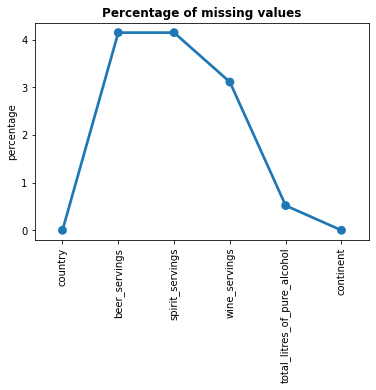

In [ ]:
missing = pd.DataFrame(missing_percentage, columns=['percentage'])

sns.pointplot(data.columns, 'percentage', data=missing)
plt.xticks(rotation=90)
plt.title('Percentage of missing values', fontweight='bold')
#plt.ylabel('percentage')
plt.show()

In [ ]:
data[data['beer_servings'].isna()]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
6,Argentina,NaN,25.0,221.0,8.3,South America
13,Bangladesh,NaN,NaN,NaN,NaN,Asia
37,Colombia,NaN,76.0,3.0,4.2,South America
64,Georgia,NaN,100.0,149.0,5.4,Europe
76,Iceland,NaN,61.0,78.0,6.6,Europe
134,Philippines,NaN,186.0,1.0,4.6,Asia
149,Saudi Arabia,NaN,5.0,0.0,0.1,Asia
188,Venezuela,NaN,100.0,3.0,7.7,South America


# Filling missing values

In [7]:
data.dtypes

country                          object
beer_servings                   float64
spirit_servings                 float64
wine_servings                   float64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

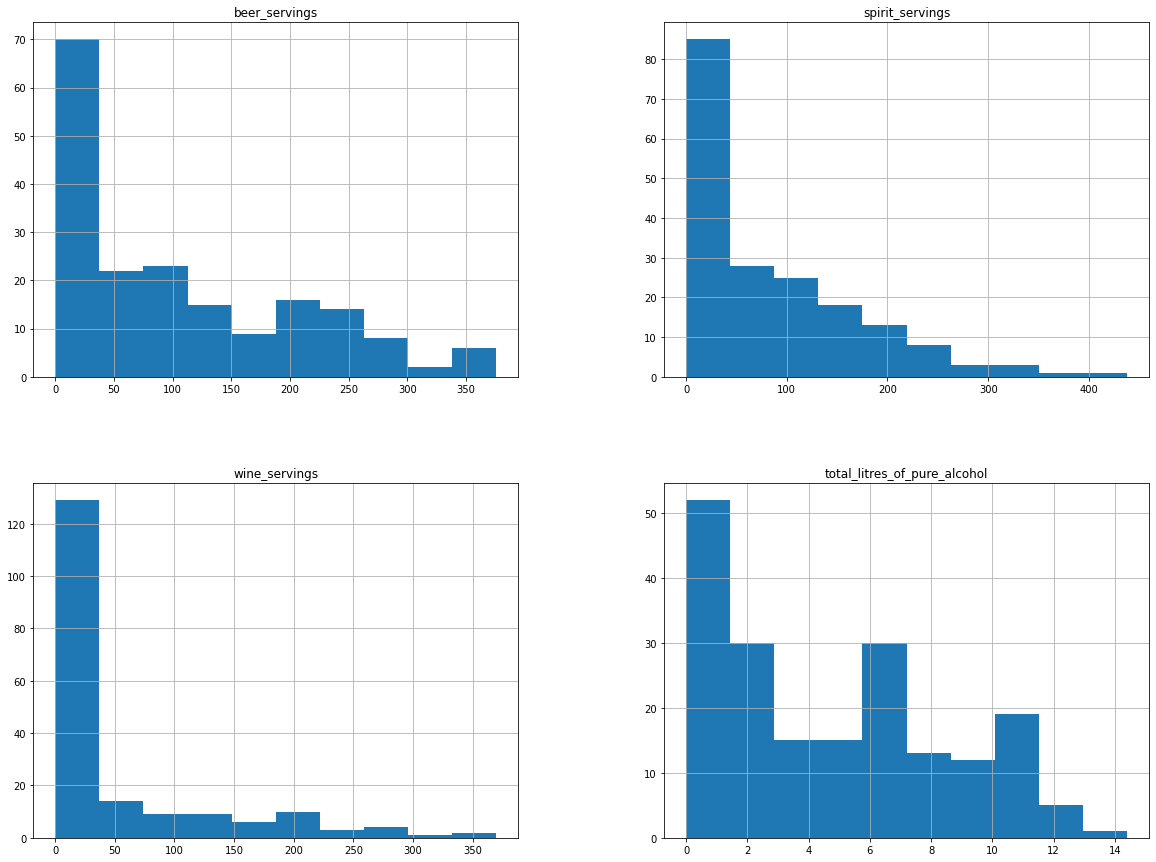

In [8]:
freq_graph = data.select_dtypes(include=['float'])
freq_graph.hist(figsize=(20,15))
plt.show()

All the columns are right skewed. Therefore can fill the missing values with median.

In [9]:
data.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [10]:
data['beer_servings'] = data['beer_servings'].fillna(data['beer_servings'].median())

In [11]:
data.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

Filling all the columns in one step by using a for loop.

In [12]:
for i in ['spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']:
  data[i] = data[i].fillna(data[i].median())

In [13]:
data.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

# Group By operation

In [ ]:
data.groupby('continent')['beer_servings'].mean()

continent
Africa            61.471698
Asia              40.613636
Europe           190.822222
North America    145.434783
Oceania           89.687500
South America    137.000000
Name: beer_servings, dtype: float64

#Dropping column having all unique values

In [14]:
data.country.nunique()

193

Only 193 rows are there and in the column of country, we have 193 unique entries. Which means all the countries are different, and so this column will not give any contribution to the machine learning model and hence we can drop it. 

In [15]:
data.drop('country',axis=1, inplace=True)

In [16]:
data.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0.0,0.0,0.0,0.0,Asia
1,89.0,132.0,54.0,4.9,Europe
2,25.0,0.0,14.0,0.7,Africa
3,245.0,138.0,312.0,12.4,Europe
4,217.0,57.0,45.0,5.9,Africa


# Handling Outliers

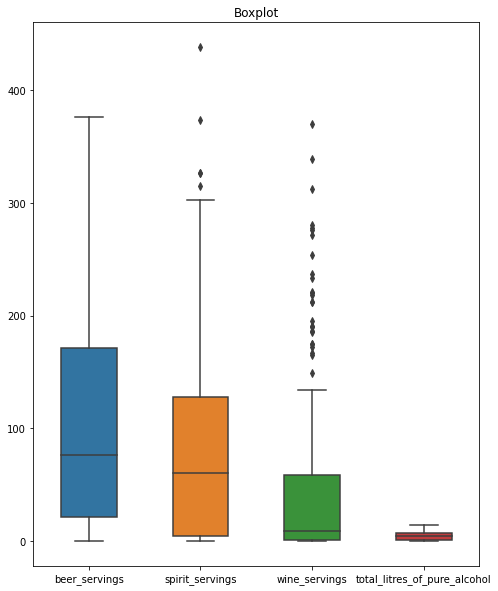

In [17]:
fig, ax = plt.subplots(figsize=(8,10))
list = ['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']
sns.boxplot(data = data[list], width=0.5)
plt.title('Boxplot')
plt.show()

outliers of spirit_servings

In [18]:
q1 = np.percentile(data['spirit_servings'], 25, interpolation='midpoint')
q2 = np.percentile(data['spirit_servings'], 50, interpolation='midpoint')
q3 = np.percentile(data['spirit_servings'], 75, interpolation='midpoint')

In [19]:
print('Q1 = ',q1, '\nQ2 = ',q2, '\nQ3 = ',q3)

Q1 =  5.0 
Q2 =  60.0 
Q3 =  128.0


In [20]:
data['spirit_servings'].median()

60.0

In [21]:
iqr = q3 - q1

In [22]:
low_lim = q1-1.5*iqr
up_lim = q3+1.5*iqr

In [23]:
print(low_lim)
print(up_lim)

-179.5
312.5


In [24]:
outlier = []
for x in data['spirit_servings']:
  if((x>up_lim) or (x<low_lim)):
    outlier.append(x)

In [25]:
outlier

[373.0, 438.0, 326.0, 326.0, 315.0]

In [26]:
index_1 = data['spirit_servings']>up_lim
data.loc[index_1].index

Int64Index([15, 68, 73, 141, 144], dtype='int64')

In [27]:
data.drop([15, 68, 73, 141, 144],inplace=True)

outliers of wine_servings

In [28]:
q1 = np.percentile(data['wine_servings'], 25, interpolation='midpoint')
q2 = np.percentile(data['wine_servings'], 50, interpolation='midpoint')
q3 = np.percentile(data['wine_servings'], 75, interpolation='midpoint')

iqr = q3 - q1

low_lim = q1-1.5*iqr
up_lim = q3+1.5*iqr

In [29]:
outlier = []
for x in data['wine_servings']:
  if((x>up_lim) or (x<low_lim)):
    outlier.append(x)

In [30]:
outlier

[312.0,
 221.0,
 212.0,
 191.0,
 212.0,
 172.0,
 254.0,
 278.0,
 233.0,
 370.0,
 149.0,
 175.0,
 218.0,
 185.0,
 165.0,
 237.0,
 271.0,
 190.0,
 175.0,
 339.0,
 167.0,
 276.0,
 186.0,
 280.0,
 195.0,
 220.0]

In [31]:
indices = data['wine_servings']>up_lim
data.loc[indices].index

Int64Index([  3,   6,   8,   9,  16,  35,  42,  48,  55,  61,  64,  65,  67,
             75,  81,  83,  99, 120, 121, 136, 140, 156, 165, 166, 182, 185],
           dtype='int64')

In [32]:
data.drop([  3,   6,   8,   9,  16,  35,  42,  48,  55,  61,  64,  65,  67,
             75,  81,  83,  99, 120, 121, 136, 140, 156, 165, 166, 182, 185],inplace=True)

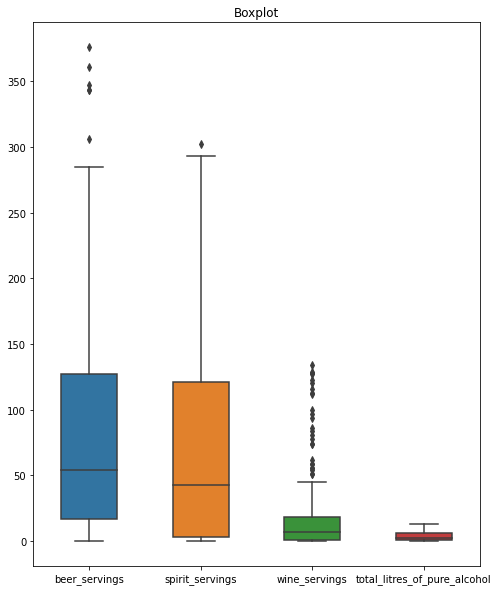

In [33]:
fig, ax = plt.subplots(figsize=(8,10))
list = ['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']
sns.boxplot(data = data[list], width=0.5)
plt.title('Boxplot')
plt.show()

In [34]:
data.shape

(162, 5)

In [35]:
data.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0.0,0.0,0.0,0.0,Asia
1,89.0,132.0,54.0,4.9,Europe
2,25.0,0.0,14.0,0.7,Africa
4,217.0,57.0,45.0,5.9,Africa
5,102.0,128.0,45.0,4.9,North America


# Encoding

### One Hot Encoding using pandas(get_dummies)

In [ ]:
data.continent.nunique()

6

In [ ]:
data1 = pd.get_dummies(data)

In [ ]:
data1.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
0,0.0,0.0,0.0,0.0,0,1,0,0,0,0
1,89.0,132.0,54.0,4.9,0,0,1,0,0,0
2,25.0,0.0,14.0,0.7,1,0,0,0,0,0
3,245.0,138.0,312.0,12.4,0,0,1,0,0,0
4,217.0,57.0,45.0,5.9,1,0,0,0,0,0


###  Label encoding using sklearn (LabelEncoder() in preprocessing)

In [36]:
data.columns

Index(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [37]:
data.continent.unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [38]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
data['continent'] = le.fit_transform(data['continent'])
data['continent'].columns = ['continent']
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)
data.head()

{'Africa': 0, 'Asia': 1, 'Europe': 2, 'North America': 3, 'Oceania': 4, 'South America': 5}


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0.0,0.0,0.0,0.0,1
1,89.0,132.0,54.0,4.9,2
2,25.0,0.0,14.0,0.7,0
4,217.0,57.0,45.0,5.9,0
5,102.0,128.0,45.0,4.9,3


# Prediction of one hot encoded 'data1'

In [ ]:
data1.columns

Index(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent_Africa', 'continent_Asia',
       'continent_Europe', 'continent_North America', 'continent_Oceania',
       'continent_South America'],
      dtype='object')

In [ ]:
y = data1['total_litres_of_pure_alcohol']
x = data1.drop('total_litres_of_pure_alcohol', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [ ]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)
predictions = model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE is: ', mean_squared_error(y_test,predictions))

MSE is:  1.4107151984592194


In [ ]:
from sklearn.metrics import r2_score
print('R_square_value is: ', r2_score(y_test, predictions))

R_square_value is:  0.8413520664385032


# Scaling, Normalisation and Feature Reduction

Scaling and normalisation functions are in **sklearn.preprocessing**

## Standard Scaling

In [ ]:
x.describe()

,beer_servings,spirit_servings,wine_servings,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,86.592593,72.240741,20.598765,0.320988,0.265432,0.148148,0.123457,0.086420,0.055556
std,91.963911,79.305981,33.331473,0.468304,0.442932,0.356348,0.329981,0.281854,0.229772
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.250000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.500000,43.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,127.000000,120.750000,18.750000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,376.000000,302.000000,134.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
type(x)

pandas.core.frame.DataFrame

In [ ]:
from sklearn import preprocessing

In [ ]:
standardisation = preprocessing.StandardScaler() # creating instance.
x = standardisation.fit_transform(x)

In [ ]:
x = pd.DataFrame(x)

In [ ]:
x.describe()

,0,1,2,3,4,5,6,7,8
count,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02
mean,-4.403199e-17,-1.117076e-16,9.594520e-18,6.579099e-17,-1.672188e-16,5.962309e-17,1.706454e-16,3.289550e-16,-6.304970e-17
std,1.003101e+00,1.003101e+00,1.003101e+00,1.003101e+00,1.003101e+00,1.003101e+00,1.003101e+00,1.003101e+00,1.003101e+00
min,-9.445129e-01,-9.137362e-01,-6.199137e-01,-6.875517e-01,-6.011194e-01,-4.170288e-01,-3.752933e-01,-3.075623e-01,-2.425356e-01
25%,-7.563577e-01,-8.757907e-01,-5.898190e-01,-6.875517e-01,-6.011194e-01,-4.170288e-01,-3.752933e-01,-3.075623e-01,-2.425356e-01
50%,-3.500515e-01,-3.698512e-01,-4.092508e-01,-6.875517e-01,-6.011194e-01,-4.170288e-01,-3.752933e-01,-3.075623e-01,-2.425356e-01
75%,4.407457e-01,6.135688e-01,-5.563805e-02,1.454436e+00,1.663563e+00,-4.170288e-01,-3.752933e-01,-3.075623e-01,-2.425356e-01
max,3.156725e+00,2.906107e+00,3.412777e+00,1.454436e+00,1.663563e+00,2.397916e+00,2.664583e+00,3.251373e+00,4.123106e+00


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)
lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)
predictions = model.predict(x_test)
print('MSE is: ', mean_squared_error(y_test,predictions))
print('R_square_value is: ', r2_score(y_test, predictions))

MSE is:  1.4107151984592208
R_square_value is:  0.841352066438503


Same result as the model without standard scaling.

## MinMax Scaling

In [ ]:
x = data1.drop('total_litres_of_pure_alcohol', axis=1)

In [ ]:
x.describe()

,beer_servings,spirit_servings,wine_servings,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,86.592593,72.240741,20.598765,0.320988,0.265432,0.148148,0.123457,0.086420,0.055556
std,91.963911,79.305981,33.331473,0.468304,0.442932,0.356348,0.329981,0.281854,0.229772
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.250000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.500000,43.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,127.000000,120.750000,18.750000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,376.000000,302.000000,134.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
min_max = preprocessing.MinMaxScaler(feature_range=(0,1)) # creating an instance.

In [ ]:
x = min_max.fit_transform(x)

In [ ]:
x = pd.DataFrame(x)

In [ ]:
x.describe()

,0,1,2,3,4,5,6,7,8
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,0.230299,0.239208,0.153722,0.320988,0.265432,0.148148,0.123457,0.086420,0.055556
std,0.244585,0.262603,0.248742,0.468304,0.442932,0.356348,0.329981,0.281854,0.229772
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.045878,0.009934,0.007463,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.144947,0.142384,0.052239,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.337766,0.399834,0.139925,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)
lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)
predictions = model.predict(x_test)
print('MSE is: ', mean_squared_error(y_test,predictions))
print('R_square_value is: ', r2_score(y_test, predictions))

MSE is:  1.41071519845922
R_square_value is:  0.8413520664385031


MinMax scaling has also not done any change in the model.

##MinMax scaling for desired data columns.

In [ ]:
x = data1.drop('total_litres_of_pure_alcohol', axis = 1)
x.head()

,beer_servings,spirit_servings,wine_servings,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
0,0.0,0.0,0.0,0,1,0,0,0,0
1,89.0,132.0,54.0,0,0,1,0,0,0
2,25.0,0.0,14.0,1,0,0,0,0,0
3,245.0,138.0,312.0,0,0,1,0,0,0
4,217.0,57.0,45.0,1,0,0,0,0,0


In [ ]:
x.select_dtypes(include='float').head()

,beer_servings,spirit_servings,wine_servings
0,0.0,0.0,0.0
1,89.0,132.0,54.0
2,25.0,0.0,14.0
3,245.0,138.0,312.0
4,217.0,57.0,45.0


In [ ]:
col_to_be_scaled = x.select_dtypes(include='float')

from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))

col_scaled = minmax.fit_transform(col_to_be_scaled)
col_scaled = pd.DataFrame(col_scaled, columns = col_to_be_scaled.columns, index = col_to_be_scaled.index)
col_scaled.head()

,beer_servings,spirit_servings,wine_servings
0,0.000000,0.000000,0.000000
1,0.236702,0.301370,0.145946
2,0.066489,0.000000,0.037838
3,0.651596,0.315068,0.843243
4,0.577128,0.130137,0.121622


In [ ]:
# combining these scaled columns to the feature dataset x

x = pd.concat([col_scaled, x.drop(col_to_be_scaled, axis=1,)], axis=1)
x.head()

,beer_servings,spirit_servings,wine_servings,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
0,0.000000,0.000000,0.000000,0,1,0,0,0,0
1,0.236702,0.301370,0.145946,0,0,1,0,0,0
2,0.066489,0.000000,0.037838,1,0,0,0,0,0
3,0.651596,0.315068,0.843243,0,0,1,0,0,0
4,0.577128,0.130137,0.121622,1,0,0,0,0,0


## Normalization

In [ ]:
x = data1.drop('total_litres_of_pure_alcohol', axis=1)
x.describe()

,beer_servings,spirit_servings,wine_servings,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,86.592593,72.240741,20.598765,0.320988,0.265432,0.148148,0.123457,0.086420,0.055556
std,91.963911,79.305981,33.331473,0.468304,0.442932,0.356348,0.329981,0.281854,0.229772
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.250000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.500000,43.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,127.000000,120.750000,18.750000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,376.000000,302.000000,134.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
x = preprocessing.normalize(x) # no need to create any instance.
x = pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5,6,7,8
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,0.648990,0.475226,0.143663,0.031865,0.046742,0.012995,0.000695,0.007435,0.000298
std,0.325793,0.343203,0.181514,0.138976,0.190563,0.110713,0.002087,0.078627,0.001315
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.404680,0.148553,0.017131,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.756581,0.497608,0.068452,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.940029,0.795130,0.208306,0.010918,0.004366,0.000000,0.000000,0.000000,0.000000
max,0.999961,0.996860,0.917663,1.000000,1.000000,1.000000,0.011570,1.000000,0.009300


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)
lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)
predictions = model.predict(x_test)
print('MSE is: ', mean_squared_error(y_test,predictions))
print('R_square_value is: ', r2_score(y_test, predictions))

MSE is:  9.955758447853306
R_square_value is:  -0.11961684861297694


indicates that normalisation is not a good option for this particular dataset. Normalization is generally used in classification algorithms.

## Feature Reduction

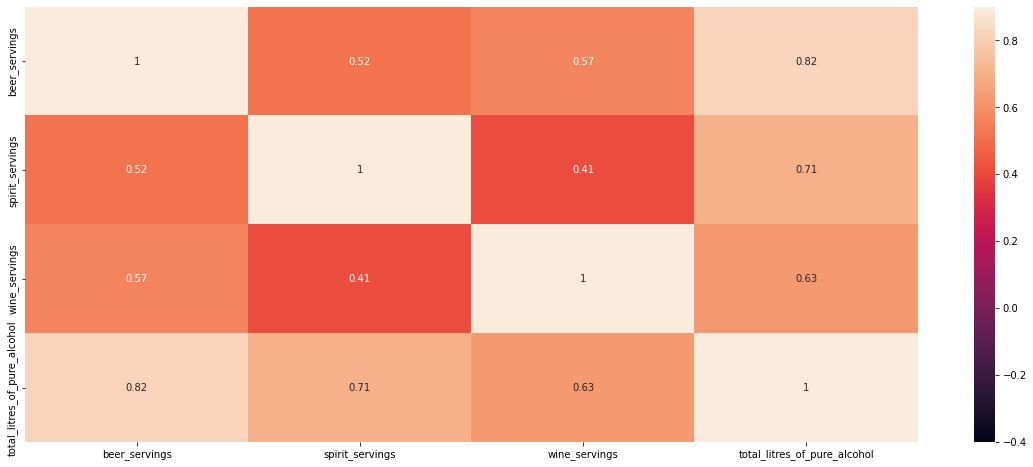

In [ ]:
corrmatrix = data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix, vmin=-0.4, vmax=0.9, annot=True)
plt.show()

In [ ]:
data.columns

Index(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [ ]:
data.drop(['spirit_servings', 'wine_servings'], axis=1, inplace=True)

In [ ]:
y = data1['total_litres_of_pure_alcohol']
x = data1.drop('total_litres_of_pure_alcohol', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)
lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)
predictions = model.predict(x_test)
print('MSE is: ', mean_squared_error(y_test,predictions))
print('R_square_value is: ', r2_score(y_test, predictions))

MSE is:  1.4107151984592194
R_square_value is:  0.8413520664385032


Here feature reduction has adversely affected our model. So it is recommended for datasets having large no.of features.

# Merging, Joining and Concatenation

##Merging

In [ ]:
df1 = pd.DataFrame({'Sachin':[80,95,65,32,105],
                    'Kohli':[87,45,12,64,45],
                    'Sanju':[36,44,56,91,50]},
                    index = [2009,2010,2011,2012,2013])

In [ ]:
df2 = pd.DataFrame({'Sachin':[80,95,65,32,105],
                    'Sewag':[36,44,56,91,50],
                    'Dhoni':[87,45,12,64,45]},
                    index = [2005,2006,2007,2008,2009])

In [ ]:
pd.merge(df1,df2, on='Sachin' )

,Sachin,Kohli,Sanju,Sewag,Dhoni
0,80,87,36,36,87
1,95,45,44,44,45
2,65,12,56,56,12
3,32,64,91,91,64
4,105,45,50,50,45


## Joining

In [ ]:
df1 = pd.DataFrame({'Sachin':[80,95,65,32,105],
                    'Kohli':[87,45,12,64,45],
                    'Sanju':[36,44,56,91,50]})
df2 = pd.DataFrame({'Ganguly':[80,95,65,32,105],
                    'Sewag':[36,44,56,91,50],
                    'Dhoni':[87,45,12,64,45]})

In [ ]:
join_data = df1.join(df2)
join_data

,Sachin,Kohli,Sanju,Ganguly,Sewag,Dhoni
0,80,87,36,80,36,87
1,95,45,44,95,44,45
2,65,12,56,65,56,12
3,32,64,91,32,91,64
4,105,45,50,105,50,45


## concatenation

In [ ]:
cancat_data = pd.concat([df1,df2],axis=1)
cancat_data

,Sachin,Kohli,Sanju,Ganguly,Sewag,Dhoni
0,80,87,36,80,36,87
1,95,45,44,95,44,45
2,65,12,56,65,56,12
3,32,64,91,32,91,64
4,105,45,50,105,50,45


## Transforming Data

In [40]:
df1 = pd.DataFrame(np.arange(36).reshape(6,6))
df2 = pd.DataFrame(np.arange(15).reshape(5,3))
df_concatenated = pd.concat([df1, df2], axis=1, ignore_index=True)
df_concatenated

,0,1,2,3,4,5,6,7,8
0,0,1,2,3,4,5,0.0,1.0,2.0
1,6,7,8,9,10,11,3.0,4.0,5.0
2,12,13,14,15,16,17,6.0,7.0,8.0
3,18,19,20,21,22,23,9.0,10.0,11.0
4,24,25,26,27,28,29,12.0,13.0,14.0
5,30,31,32,33,34,35,NaN,NaN,NaN


### Dropping Data

In [41]:
df1.drop([0,2])

,0,1,2,3,4,5
1,6,7,8,9,10,11
3,18,19,20,21,22,23
4,24,25,26,27,28,29
5,30,31,32,33,34,35


In [42]:
df1.drop([0,2], axis=1)

,1,3,4,5
0,1,3,4,5
1,7,9,10,11
2,13,15,16,17
3,19,21,22,23
4,25,27,28,29
5,31,33,34,35


In [43]:
df1.drop(columns = [1], index = [1])

,0,2,3,4,5
0,0,2,3,4,5
2,12,14,15,16,17
3,18,20,21,22,23
4,24,26,27,28,29
5,30,32,33,34,35


In [44]:
midx = pd.MultiIndex(levels=[['lama', 'cow', 'falcon'],
                              ['speed', 'weight', 'length']],
                      codes=[[0, 0, 0, 1, 1, 1, 2, 2, 2],
                             [0, 1, 2, 0, 1, 2, 0, 1, 2]])
df = pd.DataFrame(index=midx, columns=['big', 'small'],
                   data=[[45, 30], [200, 100], [1.5, 1], [30, 20],
                         [250, 150], [1.5, 0.8], [320, 250],
                         [1, 0.8], [0.3, 0.2]])
df

big  small
lama   speed    45.0   30.0
       weight  200.0  100.0
       length    1.5    1.0
cow    speed    30.0   20.0
       weight  250.0  150.0
       length    1.5    0.8
falcon speed   320.0  250.0
       weight    1.0    0.8
       length    0.3    0.2

In [45]:
df.drop(index='length', level=1)

big  small
lama   speed    45.0   30.0
       weight  200.0  100.0
cow    speed    30.0   20.0
       weight  250.0  150.0
falcon speed   320.0  250.0
       weight    1.0    0.8

In [46]:
df.drop(index='lama', columns='small')

big
cow    speed    30.0
       weight  250.0
       length    1.5
falcon speed   320.0
       weight    1.0
       length    0.3

### Adding data

In [47]:
series_obj = pd.Series(np.arange(6))
series_obj.name = 'variable_to_be_added'
series_obj

0    0
1    1
2    2
3    3
4    4
5    5
Name: variable_to_be_added, dtype: int64

In [48]:
variable_added = pd.DataFrame.join(df1, series_obj)
variable_added

,0,1,2,3,4,5,variable_to_be_added
0,0,1,2,3,4,5,0
1,6,7,8,9,10,11,1
2,12,13,14,15,16,17,2
3,18,19,20,21,22,23,3
4,24,25,26,27,28,29,4
5,30,31,32,33,34,35,5


In [49]:
df_appended = variable_added.append(variable_added)
df_appended

,0,1,2,3,4,5,variable_to_be_added
0,0,1,2,3,4,5,0
1,6,7,8,9,10,11,1
2,12,13,14,15,16,17,2
3,18,19,20,21,22,23,3
4,24,25,26,27,28,29,4
5,30,31,32,33,34,35,5
0,0,1,2,3,4,5,0
1,6,7,8,9,10,11,1
2,12,13,14,15,16,17,2
3,18,19,20,21,22,23,3


In [50]:
df_appended = variable_added.append(variable_added, ignore_index=True)
df_appended

,0,1,2,3,4,5,variable_to_be_added
0,0,1,2,3,4,5,0
1,6,7,8,9,10,11,1
2,12,13,14,15,16,17,2
3,18,19,20,21,22,23,3
4,24,25,26,27,28,29,4
5,30,31,32,33,34,35,5
6,0,1,2,3,4,5,0
7,6,7,8,9,10,11,1
8,12,13,14,15,16,17,2
9,18,19,20,21,22,23,3


### Sorting data

In [51]:
df_sorted = df1.sort_values(by=[5], ascending=False)
df_sorted

,0,1,2,3,4,5
5,30,31,32,33,34,35
4,24,25,26,27,28,29
3,18,19,20,21,22,23
2,12,13,14,15,16,17
1,6,7,8,9,10,11
0,0,1,2,3,4,5


In [52]:
df_concatenated

,0,1,2,3,4,5,6,7,8
0,0,1,2,3,4,5,0.0,1.0,2.0
1,6,7,8,9,10,11,3.0,4.0,5.0
2,12,13,14,15,16,17,6.0,7.0,8.0
3,18,19,20,21,22,23,9.0,10.0,11.0
4,24,25,26,27,28,29,12.0,13.0,14.0
5,30,31,32,33,34,35,NaN,NaN,NaN


In [53]:
df_concatenated.sort_values(by=[6], kind = 'mergesort', na_position='last', ascending=False)

,0,1,2,3,4,5,6,7,8
4,24,25,26,27,28,29,12.0,13.0,14.0
3,18,19,20,21,22,23,9.0,10.0,11.0
2,12,13,14,15,16,17,6.0,7.0,8.0
1,6,7,8,9,10,11,3.0,4.0,5.0
0,0,1,2,3,4,5,0.0,1.0,2.0
5,30,31,32,33,34,35,NaN,NaN,NaN
